In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import ta  # For technical indicators

In [2]:
df = pd.read_excel(r'C:\Users\USER\Desktop\HTU\First Semester 4rth Year\Applied Analytical Modelling\gold_futures.xlsx')
df

,Date,Open,High,Low,Close,Adj Close,Volume,Price Movement
0,2020-01-02,1518.099976,1528.699951,1518.000000,1524.500000,1524.500000,214,Up
1,2020-01-03,1530.099976,1552.699951,1530.099976,1549.199951,1549.199951,107,Up
2,2020-01-06,1580.000000,1580.000000,1560.400024,1566.199951,1566.199951,416,Up
3,2020-01-07,1558.300049,1576.300049,1558.300049,1571.800049,1571.800049,47,Up
4,2020-01-08,1579.699951,1604.199951,1552.300049,1557.400024,1557.400024,236,Down
...,...,...,...,...,...,...,...,...
1240,2024-12-10,2662.300049,2698.199951,2661.000000,2697.600098,2697.600098,437,Up
1241,2024-12-11,2701.800049,2733.800049,2693.100098,2733.800049,2733.800049,3387,Up
1242,2024-12-12,2725.100098,2725.100098,2677.399902,2687.500000,2687.500000,2365,Down
1243,2024-12-13,2688.199951,2689.300049,2647.899902,2656.000000,2656.000000,1125,Down


In [3]:
df.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Price Movement    0
dtype: int64

In [4]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1245,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000
mean,2022-06-25 04:44:31.807228928,1935.453574,1945.315985,1925.952770,1935.689395,1935.689395,4225.694779
min,2020-01-02 00:00:00,1469.300049,1484.000000,1452.099976,1477.300049,1477.300049,0.000000
25%,2021-03-30 00:00:00,1779.500000,1787.800049,1770.099976,1777.199951,1777.199951,74.000000
50%,2022-06-24 00:00:00,1869.300049,1876.000000,1862.599976,1868.300049,1868.300049,231.000000
75%,2023-09-21 00:00:00,1988.199951,1994.599976,1977.699951,1985.000000,1985.000000,645.000000
max,2024-12-16 00:00:00,2787.399902,2789.000000,2774.600098,2788.500000,2788.500000,251274.000000
std,NaN,260.426016,261.177932,259.766152,260.533468,260.533468,23181.283059


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1245 non-null   datetime64[ns]
 1   Open            1245 non-null   float64       
 2   High            1245 non-null   float64       
 3   Low             1245 non-null   float64       
 4   Close           1245 non-null   float64       
 5   Adj Close       1245 non-null   float64       
 6   Volume          1245 non-null   int64         
 7   Price Movement  1245 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 77.9+ KB


In [6]:
if 'Price Movement' in df.columns:
    le = LabelEncoder()
    df['Price Movement'] = le.fit_transform(df['Price Movement'])

#transform date to year column, and a month column, and a day column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop('Date', axis=1, inplace=True)

In [7]:
# Calculate RSI
df_advenced = df.copy()

df_advenced['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

# Calculate MACD
macd = ta.trend.MACD(df_advenced['Close'])
df_advenced['MACD'] = macd.macd()
df_advenced['MACD_Signal'] = macd.macd_signal()

df_advenced.isnull().sum()

df_advenced.dropna(inplace=True)


In [8]:
X = df.drop('Price Movement', axis=1)
y = df['Price Movement']

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X1 = df_advenced.drop('Price Movement', axis=1)
y1 = df_advenced['Price Movement']

feature_names = X1.columns

In [12]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [13]:
# Without RSI and MACD
X_train_basic = X_train
X_test_basic = X_test

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_basic, y_train)
y_pred_basic_rf = rf.predict(X_test_basic)

# With RSI and MACD
rf_advanced = RandomForestClassifier(random_state=42)
rf_advanced.fit(X_train2, y_train2)
y_pred_advanced_rf = rf_advanced.predict(X_test2)

# Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred))
    print("\n")

# Random Forest Evaluation
print("Random Forest (Basic Features):")
evaluate_model(y_test, y_pred_basic_rf, "RF Basic")
print("Random Forest (Advanced Features):")
evaluate_model(y_test2, y_pred_advanced_rf, "RF Advanced")

Random Forest (Basic Features):
RF Basic Performance:
Accuracy: 0.7108433734939759
F1 Score: 0.7446808510638298
ROC-AUC: 0.7054195804195804


Random Forest (Advanced Features):
RF Advanced Performance:
Accuracy: 0.6707818930041153
F1 Score: 0.7122302158273381
ROC-AUC: 0.6649796195652173




In [14]:
importance = rf_advanced.feature_importances_

feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)
print(feature_importance)

        Feature  Importance
9           RSI    0.181548
10         MACD    0.108444
11  MACD_Signal    0.093471
0          Open    0.092407
3         Close    0.088940
5        Volume    0.086787
4     Adj Close    0.083611
2           Low    0.075055
1          High    0.072133
8           Day    0.068865
7         Month    0.034572
6          Year    0.014168


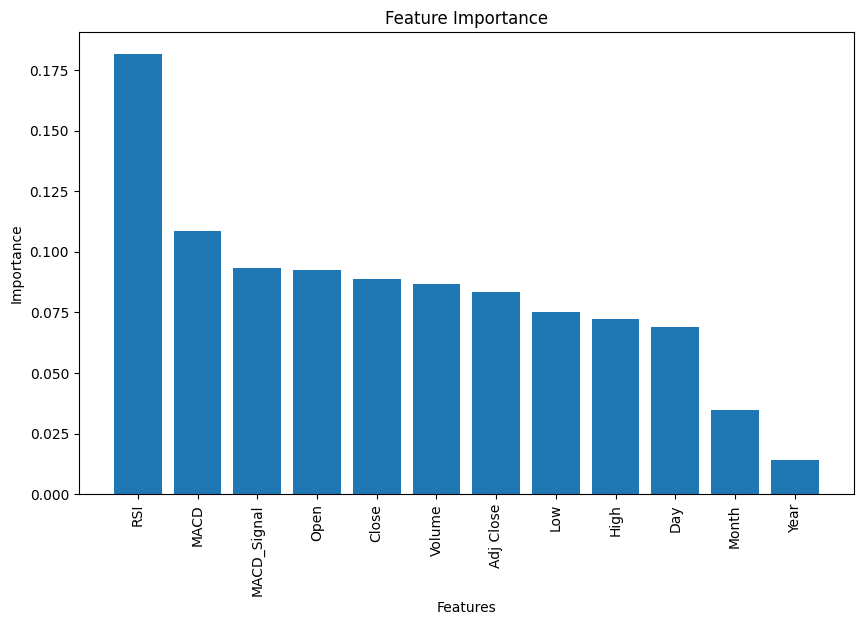

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.show()